In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
#importing data from the dataset
df = pd.read_csv(r"C:\Users\agarw\OneDrive\Desktop\Dissertation\data.csv")

In [4]:
#checking for bankrupt companies 0 is non-bankrupt and 1 is bankrupt
bankrupt_data = df['Bankrupt?'].value_counts()
bankrupt_data

0    6599
1     220
Name: Bankrupt?, dtype: int64

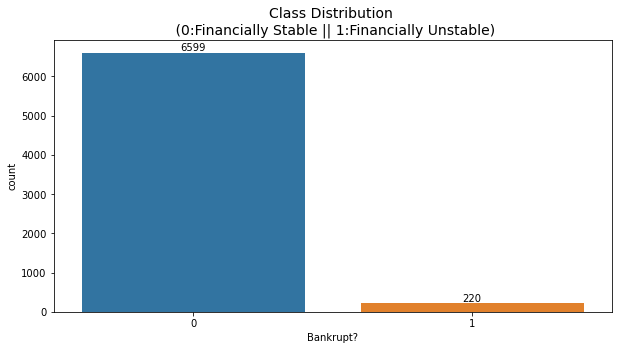

In [5]:
#Distribution representation
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Bankrupt?'])
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

In [6]:
# seperate the Bankrupt label from the dataset 
y = df['Bankrupt?']
X = df.drop(['Bankrupt?'], axis = 1)

In [7]:
# divinding our dataset into training dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

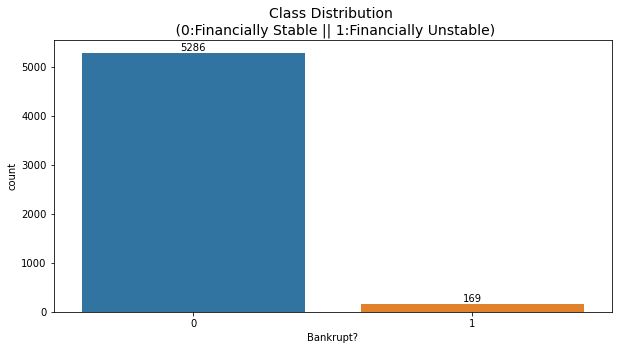

In [8]:
plt.figure(figsize = (10,5))
ax = sns.countplot(y_train)
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

In [9]:
# divinding our dataset into testing and validation 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [10]:
clf = RandomForestClassifier(random_state=42)

In [11]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<H1>Validation</H1>

In [12]:
y_pred_val = clf.predict(X_val)

In [13]:
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1_value = f1_score(y_val, y_pred_val)

In [14]:
print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)

Accuracy 0.9721407624633431
Precision 0.6666666666666666
Recall 0.1
F1 Score 0.1739130434782609


In [15]:
conf_matrix = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[661   1]
 [ 18   2]]


In [16]:
class_report = classification_report(y_val, y_pred_val)
print(class_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       662
           1       0.67      0.10      0.17        20

    accuracy                           0.97       682
   macro avg       0.82      0.55      0.58       682
weighted avg       0.96      0.97      0.96       682



<H1>Testing</H1>

In [17]:
y_pred_testing = clf.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred_testing)
precision = precision_score(y_test, y_pred_testing)
recall = recall_score(y_test, y_pred_testing)
f1_value = f1_score(y_test, y_pred_testing)

In [19]:
print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)

Accuracy 0.9633431085043989
Precision 0.875
Recall 0.22580645161290322
F1 Score 0.358974358974359


In [20]:
conf_matrix = confusion_matrix(y_val, y_pred_testing)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[654   8]
 [ 20   0]]


In [21]:
class_report = classification_report(y_val, y_pred_testing)
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       662
           1       0.00      0.00      0.00        20

    accuracy                           0.96       682
   macro avg       0.49      0.49      0.49       682
weighted avg       0.94      0.96      0.95       682



<H1>SMOTE = 1</H1>

In [22]:
# divinding our dataset into training dataset
X_train_smote, X_temp_smote, y_train_smote, y_temp_smote = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_val_smote, X_test_smote, y_val_smote, y_test_smote = train_test_split(X_temp_smote, y_temp_smote, test_size=0.5, random_state=42)

In [24]:
smote = SMOTE(sampling_strategy=1,random_state=42)

In [25]:
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train_smote, y_train_smote)

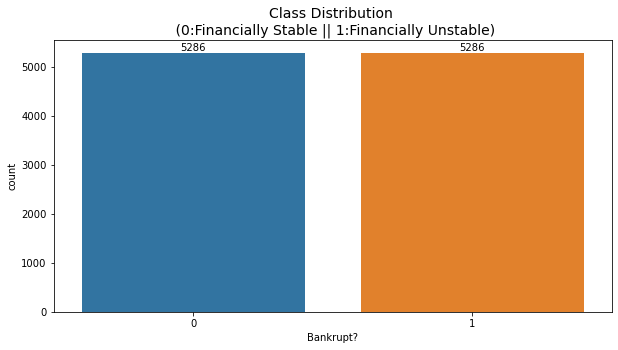

In [26]:
plt.figure(figsize = (10,5))
ax = sns.countplot(y_resampled_smote)
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

In [27]:
clf_smote = RandomForestClassifier(random_state=42)

In [28]:
clf.fit(X_resampled_smote, y_resampled_smote)

RandomForestClassifier(random_state=42)

<H1>Validation</H1>

In [29]:
y_pred_val_smote = clf.predict(X_val_smote)

In [30]:
accuracy = accuracy_score(y_val_smote, y_pred_val_smote)
precision = precision_score(y_val_smote, y_pred_val_smote)
recall = recall_score(y_val_smote, y_pred_val_smote)
f1_value = f1_score(y_val_smote, y_pred_val_smote)

In [31]:
print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)

Accuracy 0.9589442815249267
Precision 0.375
Recall 0.6
F1 Score 0.4615384615384615


In [32]:
conf_matrix = confusion_matrix(y_val_smote, y_pred_val_smote)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[642  20]
 [  8  12]]


In [33]:
class_report = classification_report(y_val_smote, y_pred_val_smote)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       662
           1       0.38      0.60      0.46        20

    accuracy                           0.96       682
   macro avg       0.68      0.78      0.72       682
weighted avg       0.97      0.96      0.96       682



<H1>Testing</H1>

In [34]:
y_pred_testing_smote = clf.predict(X_test_smote)

In [35]:
accuracy = accuracy_score(y_test_smote, y_pred_testing_smote)
precision = precision_score(y_test_smote, y_pred_testing_smote)
recall = recall_score(y_test_smote, y_pred_testing_smote)
f1_value = f1_score(y_test_smote, y_pred_testing_smote)

In [36]:
print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)

Accuracy 0.9472140762463344
Precision 0.43243243243243246
Recall 0.5161290322580645
F1 Score 0.47058823529411764


In [37]:
conf_matrix = confusion_matrix(y_test_smote, y_pred_testing_smote)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[630  21]
 [ 15  16]]


In [38]:
class_report = classification_report(y_test_smote, y_pred_testing_smote)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       651
           1       0.43      0.52      0.47        31

    accuracy                           0.95       682
   macro avg       0.70      0.74      0.72       682
weighted avg       0.95      0.95      0.95       682



<H1>SMOTE = 0.5</H1>

In [39]:
# divinding our dataset into training dataset
X_train_smote, X_temp_smote, y_train_smote, y_temp_smote = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_val_smote, X_test_smote, y_val_smote, y_test_smote = train_test_split(X_temp_smote, y_temp_smote, test_size=0.5, random_state=42)

In [41]:
smote = SMOTE(sampling_strategy=0.5,random_state=42)

In [42]:
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train_smote, y_train_smote)

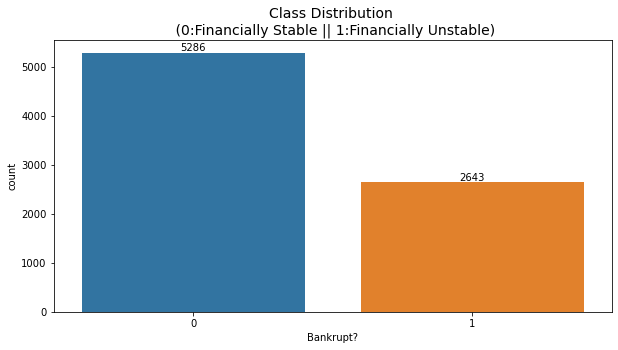

In [43]:
plt.figure(figsize = (10,5))
ax = sns.countplot(y_resampled_smote)
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

In [44]:
clf_smote = RandomForestClassifier(random_state=42)

In [45]:
clf.fit(X_resampled_smote, y_resampled_smote)

RandomForestClassifier(random_state=42)

<H1>Validation</H1>

In [46]:
y_pred_val_smote = clf.predict(X_val_smote)

In [47]:
accuracy = accuracy_score(y_val_smote, y_pred_val_smote)
precision = precision_score(y_val_smote, y_pred_val_smote)
recall = recall_score(y_val_smote, y_pred_val_smote)
f1_value = f1_score(y_val_smote, y_pred_val_smote)

In [48]:
print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)

Accuracy 0.9633431085043989
Precision 0.4074074074074074
Recall 0.55
F1 Score 0.46808510638297873


In [49]:
conf_matrix = confusion_matrix(y_val_smote, y_pred_val_smote)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[646  16]
 [  9  11]]


In [50]:
class_report = classification_report(y_val_smote, y_pred_val_smote)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       662
           1       0.41      0.55      0.47        20

    accuracy                           0.96       682
   macro avg       0.70      0.76      0.72       682
weighted avg       0.97      0.96      0.97       682



<H1>Testing</H1>

In [51]:
y_pred_testing_smote = clf.predict(X_test_smote)

In [52]:
accuracy = accuracy_score(y_test_smote, y_pred_testing_smote)
precision = precision_score(y_test_smote, y_pred_testing_smote)
recall = recall_score(y_test_smote, y_pred_testing_smote)
f1_value = f1_score(y_test_smote, y_pred_testing_smote)

In [53]:
print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)

Accuracy 0.9530791788856305
Precision 0.48484848484848486
Recall 0.5161290322580645
F1 Score 0.5


In [54]:
conf_matrix = confusion_matrix(y_test_smote, y_pred_testing_smote)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[634  17]
 [ 15  16]]


In [55]:
class_report = classification_report(y_test_smote, y_pred_testing_smote)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       651
           1       0.48      0.52      0.50        31

    accuracy                           0.95       682
   macro avg       0.73      0.75      0.74       682
weighted avg       0.95      0.95      0.95       682



<H1>SMOTE = 0.25</H1>

In [56]:
# divinding our dataset into training dataset
X_train_smote, X_temp_smote, y_train_smote, y_temp_smote = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_val_smote, X_test_smote, y_val_smote, y_test_smote = train_test_split(X_temp_smote, y_temp_smote, test_size=0.5, random_state=42)

In [58]:
smote = SMOTE(sampling_strategy=0.25,random_state=42)

In [59]:
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train_smote, y_train_smote)

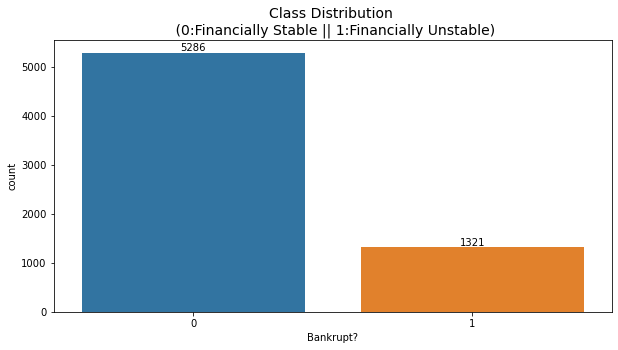

In [60]:
plt.figure(figsize = (10,5))
ax = sns.countplot(y_resampled_smote)
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

In [61]:
clf_smote = RandomForestClassifier(random_state=42)

In [62]:
clf.fit(X_resampled_smote, y_resampled_smote)

RandomForestClassifier(random_state=42)

<H1>Validation</H1>

In [63]:
y_pred_val_smote = clf.predict(X_val_smote)

In [64]:
accuracy = accuracy_score(y_val_smote, y_pred_val_smote)
precision = precision_score(y_val_smote, y_pred_val_smote)
recall = recall_score(y_val_smote, y_pred_val_smote)
f1_value = f1_score(y_val_smote, y_pred_val_smote)

In [65]:
print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)

Accuracy 0.9750733137829912
Precision 0.5789473684210527
Recall 0.55
F1 Score 0.5641025641025641


In [66]:
conf_matrix = confusion_matrix(y_test_smote, y_pred_testing_smote)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[634  17]
 [ 15  16]]


In [67]:
class_report = classification_report(y_val_smote, y_pred_val_smote)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       662
           1       0.58      0.55      0.56        20

    accuracy                           0.98       682
   macro avg       0.78      0.77      0.78       682
weighted avg       0.97      0.98      0.97       682



<H1>Testing</H1>

In [68]:
y_pred_testing_smote = clf.predict(X_test_smote)

In [69]:
accuracy = accuracy_score(y_test_smote, y_pred_testing_smote)
precision = precision_score(y_test_smote, y_pred_testing_smote)
recall = recall_score(y_test_smote, y_pred_testing_smote)
f1_value = f1_score(y_test_smote, y_pred_testing_smote)

In [70]:
print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)

Accuracy 0.9545454545454546
Precision 0.5
Recall 0.3870967741935484
F1 Score 0.43636363636363634


In [71]:
conf_matrix = confusion_matrix(y_test_smote, y_pred_testing_smote)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[639  12]
 [ 19  12]]


In [72]:
class_report = classification_report(y_test_smote, y_pred_testing_smote)
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       651
           1       0.50      0.39      0.44        31

    accuracy                           0.95       682
   macro avg       0.74      0.68      0.71       682
weighted avg       0.95      0.95      0.95       682

